# Experimental Data (Testing)

In [92]:
base='Paen_5ulh_pre/'
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
files=os.listdir(base)

full_files=[]
sorted_frames = sorted(files, key=lambda x: int(x[3:-4]))
for i in range(len(sorted_frames)):
    file = base+sorted_frames[i]
    full_files.append(file)

In [93]:
#torch.cuda.empty_cache()
import gc
gc.collect()

44

# Load Test Images

In [94]:
full_files[0]

'Paen_5ulh_pre/tst0.tif'

In [95]:
import cv2
import numpy as np
import cv2
from joblib import Parallel, delayed
l=448
from PIL import Image
# def process_file(file_path):
#     image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
#     resized_image = cv2.resize(image, [l, l])
#     return resized_image
def process_file(file_path):
    image = np.array(Image.open(file_path))
    resized_image = cv2.resize(image, [l, l])
    resized_image = (resized_image-np.min(resized_image))/(np.max(resized_image)-np.min(resized_image))
    return resized_image

def parallel_image_processing(full_files):
    num_files = len(full_files)
    images = np.zeros([num_files, l, l])

    results = Parallel(n_jobs=16)(delayed(process_file)(file_path) for file_path in full_files)

    for i, resized_image in enumerate(results):
        images[i] = resized_image

    return images

images = parallel_image_processing(full_files)

In [96]:
import gc
torch.cuda.empty_cache()
gc.collect()
images.shape

(3200, 448, 448)

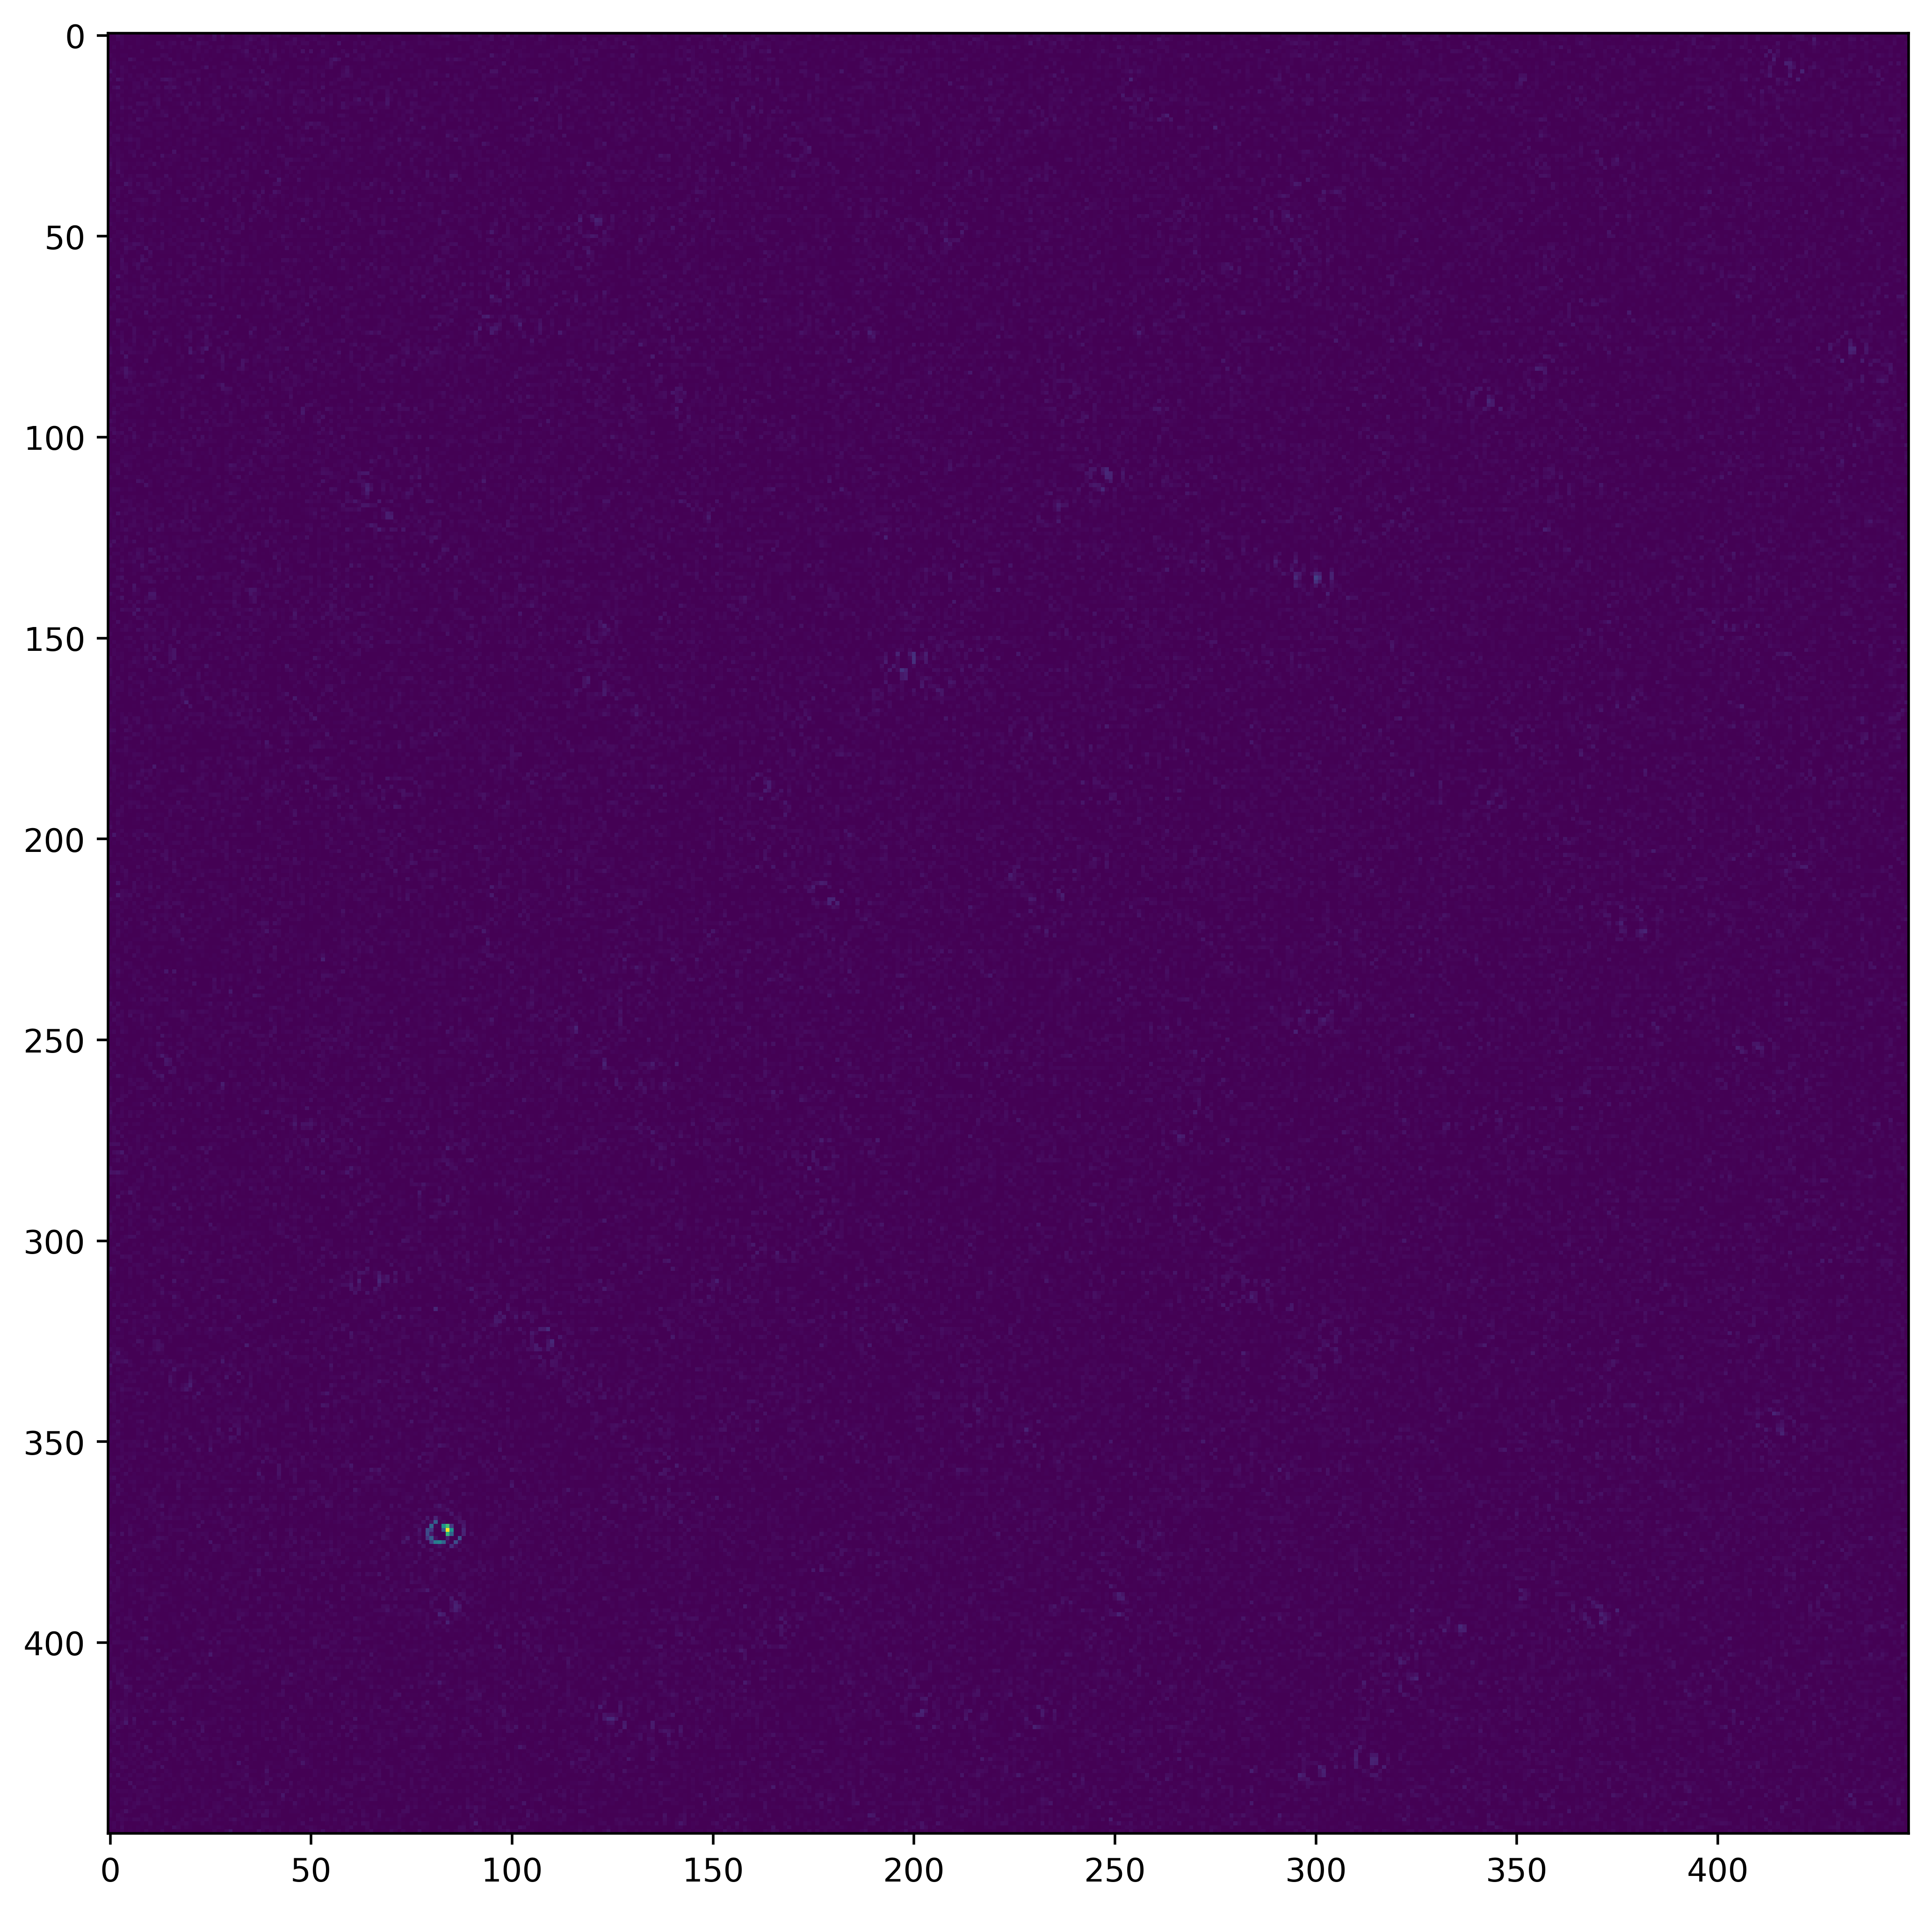

In [84]:
plt.figure(figsize=(10,10),dpi=500)
plt.imshow(images[-1])


In [60]:
# for i in range(len(images)):
#     images[i] = 1-images[i]
    

In [61]:
np.mean(images)

0.01589618882026157

In [62]:
torch.mean(images_train[0])

tensor(0.1213)

In [49]:
from torch import nn
import torch.nn.functional as F

class Patch_model2(nn.Module):
    def __init__(self):
        super(Patch_model2, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model3(nn.Module):
    def __init__(self):
        super(Patch_model3, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model4(nn.Module):
    def __init__(self):
        super(Patch_model4, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc0=nn.Linear(2000, 500)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        #x = F.gelu(self.fc1(x))
        x = self.fc0(x)
        return x#,x2,x3,x4


class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(4000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = torch.cat([x,x0],dim=1)#x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=1000,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4
    

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'
# m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
# model=Net2()
# model.to(device)
# Define your custom dataset

class TestDataset2(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]

        return image.float()

In [51]:
model6 = Patch_model3()
model6.load_state_dict(torch.load('models/speed_model_volod1_patch_4x224px_dispBrown_4_21'))
model6.to(device).eval()

model7 = Patch_model()
model7.load_state_dict(torch.load('models/speed_model_Volo224-448_dispBrown_patch_v3'))
model7.to(device).eval()

model8 =Patch_model2()
model8.load_state_dict(torch.load('models/speed_model_Volo224-448_dispBrown_patch_v1'))
model8.to(device).eval()

model17 =Patch_model4()
model17.load_state_dict(torch.load('models/speed_model_patch448px_disp300_4_23_v2'))
model17.to(device).eval()


Patch_model4(
  (m1): VOLO(
    (patch_embed): PatchEmbed(
      (conv): Sequential(
        (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (network): ModuleList(
      (0): Sequential(
        (0): Outlooker(
          (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=T

In [419]:
model5 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=1000,pretrained=False)
model5.load_state_dict(torch.load('models/speed_model_volod3_448px_dispBrown_4_22_v2'))
model5.to(device).eval()

model1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=1000,pretrained=False)
model1.load_state_dict(torch.load('models/speed_model_volod3_448px_dispBrown_4_22'))
model1.to(device).eval()

model2 = timm.create_model('twins_svt_small', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/speed_model_TwinsSvtSmall_500px_opposite_dispBrown_4_21'))
model2.to(device).eval()

model3 = timm.create_model('volo_d2_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/speed_model_volod1_224px_disp_4_21'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/speed_model_volod1_224px_dispBrown_4_21'))
model4.to(device).eval()

model18 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model18.load_state_dict(torch.load('models/speed_model_384px_disp300_4_23'))
model18.to(device).eval()

model19 = timm.create_model('volo_d2_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model19.load_state_dict(torch.load('models/speed_model_384px_disp300_4_23_v2'))
model19.to(device).eval()

model20 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model20.load_state_dict(torch.load('models/speed_model_volod3_448px_disp300_4_25'))
model20.to(device).eval()


VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [408]:
model9 = Net0()
model9.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_full'))
model9.to(device).eval()

model10 = Net0()
model10.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_fullv2'))
model10.to(device).eval()

model11 = Net0()
model11.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_fullv3'))
model11.to(device).eval()

model12 = Net0()
model12.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_full_new_v1'))
model12.to(device).eval()

model13 = Net2()
model13.load_state_dict(torch.load('models/speed_model_Volo448_dispBrown'))
model13.to(device).eval()

model14 = Net3()
model14.load_state_dict(torch.load('models/speed_model_Volo448_dispBrown_full'))
model14.to(device).eval()


Net3(
  (m1): VOLO(
    (patch_embed): PatchEmbed(
      (conv): Sequential(
        (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (proj): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (network): ModuleList(
      (0): Sequential(
        (0): Outlooker(
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
   

In [410]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [412]:
model15 = timm.create_model('swinv2_small_window16_256', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model15.load_state_dict(torch.load('models/speed_model_patch_swin_256px_dispBrown_4_23'))
model15.to(device).eval()

model16 = timm.create_model('botnet26t_256', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model16.load_state_dict(torch.load('models/speed_model_ByobNet26_256px_dispBrown_4_23'))
model16.to(device).eval()

ByobNet(
  (stem): Stem(
    (conv1): ConvNormAct(
      (conv): Conv2d(40, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (conv2): ConvNormAct(
      (conv): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (conv3): ConvNormAct(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)


In [97]:
(images.shape[0])/30

106.66666666666667

In [98]:
#Paen
#images = images[22:,:,:].reshape([(images.shape[0]-22)//40,40,500,500])
#Geo
#images = images[:-39,:,:].reshape([(images.shape[0]-39)//40,40,500,500])
images = images[20:,:,:].reshape([(images.shape[0]-20)//30,30,448,448])
images.shape

(106, 30, 448, 448)

In [87]:
images.shape

(53, 30, 448, 448)

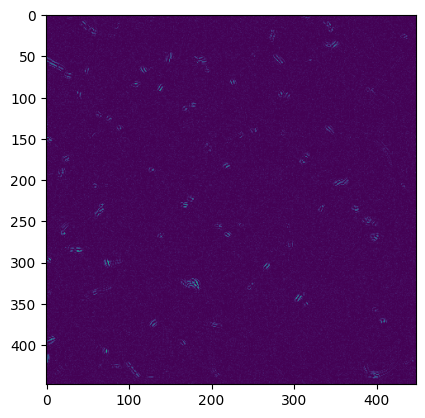

In [99]:
images = torch.tensor(images)
dataset_test = TestDataset2(images)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 8
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=0)
x = next(iter(test_dataloader))
plt.imshow(x[0,29,:,:])

In [87]:
x.shape

torch.Size([53, 224, 224])

In [1194]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()

model.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()
model7.eval()
model8.eval()
model9.eval()
model10.eval()
model11.eval()
model12.eval()
model13.eval()
model14.eval()
model15.eval()
model16.eval()
model17.eval()
model18.eval()
model19.eval()
model20.eval()



with torch.no_grad():
    for x in test_dataloader:
        x=1-x
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 224)
        x3 = torchvision.transforms.functional.resize(x, 384)
        x4 = torchvision.transforms.functional.resize(x, 256)
        #out1_1000 = (model1((1-x1).to(device)).detach().cpu().numpy())
        #out1 = np.zeros([batch_size,500])
        #for i in range(len(out1)):
        #    out1[i,:] = interpolate_vectors(out1_1000[i,:],500)
        out2 = (model2((x).to(device)).detach().cpu().numpy())
        out11 = (model11((x3).to(device)).detach().cpu().numpy())
        #out10 =(model10((x3).to(device)).detach().cpu().numpy())
        out9 = (model9((x3).to(device)).detach().cpu().numpy())
        out8 = (model8((x1).to(device)).detach().cpu().numpy())
        out7 =(model7((x1).to(device)).detach().cpu().numpy())
        out6 = (model6((1-x1).to(device)).detach().cpu().numpy())
        out3 = (model3((1-x2).to(device)).detach().cpu().numpy())
        out4 = (model4((x2).to(device)).detach().cpu().numpy())
        #out5 = np.sort(model5((x1).to(device)).detach().cpu().numpy())
        out12 = (model12((x3).to(device)).detach().cpu().numpy())
        out0 = (model((1-x1).to(device)).detach().cpu().numpy())
        out13_1000 = (model13((x1).to(device)).detach().cpu().numpy())
        out13 = np.zeros([batch_size,500])
        for i in range(len(out13)):
            out13[i,:] = interpolate_vectors(out13_1000[i,:],500)
        out14 = (model14((x1).to(device)).detach().cpu().numpy())
        out15 = (model15((1-x4).to(device)).detach().cpu().numpy())
        #out16 = (model16((1-x4).to(device)).detach().cpu().numpy())
        out17 = (model17((1-x1).to(device)).detach().cpu().numpy())
        out18 = (model18((x3).to(device)).detach().cpu().numpy())
        out19 = (model19((1-x3).to(device)).detach().cpu().numpy())
        out20 = (model20((1-x1).to(device)).detach().cpu().numpy())
        
        #1ulh
        out=(out3*8+out4*3+out6*2+out7*1+out8*1+out12*1+out13*4+out14*1+out15*3+out17*10+out18*8+out19*6+out20*2+out0*2+out9*3)/55
        
        #5ulh
        #out=(out3*1+out4*10+out8*15+out11*33+out13*25+out14*5+out18*17+out19*7+out0*2)/115

        outputs.append(out)
        #outputs2.append(out2)

In [620]:
out13.shape

(13, 1000)

In [348]:
out0 = np.reshape(out0, [out0.shape[0]*out0.shape[1],])
        out2 = np.reshape(out2, [out2.shape[0]*out2.shape[1],])
        out9 = np.reshape(out9, [out9.shape[0]*out9.shape[1],])
        out10 = np.reshape(out10, [out10.shape[0]*out10.shape[1],])
        out11 = np.reshape(out11, [out11.shape[0]*out11.shape[1],])
        out0[out0<0] = out0[out0<0] - np.min(out0)
        out2[out2<0] = out0[out2<0] - np.min(out2)
        out9[out9<0] = out0[out9<0] - np.min(out9)
        out10[out10<0] = out0[out10<0] - np.min(out10)
        out11[out11<0] = out0[out11<0] - np.min(out11)
        out0 = interpolate_vectors(out0, batch_size*500)
        out2 = interpolate_vectors(out2, batch_size*500)
        out9 = interpolate_vectors(out9, batch_size*500)
        out10 = interpolate_vectors(out10, batch_size*500)
        out11 = interpolate_vectors(out11, batch_size*500)

(13, 500)

In [100]:
model.eval()
# model9.eval()
# # model10.eval()
# model11.eval()
import torchvision
outputs=[]

with torch.no_grad():
    for x in test_dataloader:
        #x1 = torchvision.transforms.functional.resize(x, 384)
        # out1_1000 = np.sort(model((x).to(device)).detach().cpu().numpy())
        # out1 = np.zeros([batch_size,500])
        # for i in range(len(out1)):
        #     out1[i,:] = interpolate_vectors(out1_1000[i,:],500)
        #out2 = np.sort(model9((1-x1).to(device)).detach().cpu().numpy())
        #out11 = (model11((x1).to(device)).detach().cpu().numpy())
        out10 =F.softmax(model((x).to(device)).detach().cpu(),1).numpy()
        #out = (out11*3+out10*1+out2*2)/6

        outputs.append(out10)

In [101]:
np.mean(np.vstack(outputs),0)

array([3.4543129e-05, 1.5673909e-04, 3.3262121e-03, 9.8638183e-01,
       1.0100461e-02], dtype=float32)

In [93]:
np.mean(outputs)


16.886599

In [112]:
out = np.reshape(np.hstack(outputs),[40000 ,])
#out = out[out>0]
out.shape

(40000,)

In [113]:
np.mean(out)

3.1686466

### Geobacter 1 = "out"

In [70]:
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector

In [114]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[7]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
vels=1
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posx = .325*df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
        posy = .325*df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    
        vels = np.hstack([vels, vel])

pean_1ulh_001.csv


In [115]:
vels=vels[~np.isnan(vels)]
vels = vels[vels<800]
vels = vels[vels>0]

In [116]:
print(np.mean(out*.325/.12))
print(np.mean(vels))

8.581752
9.539032962912977


In [442]:
out.shape

(6500,)

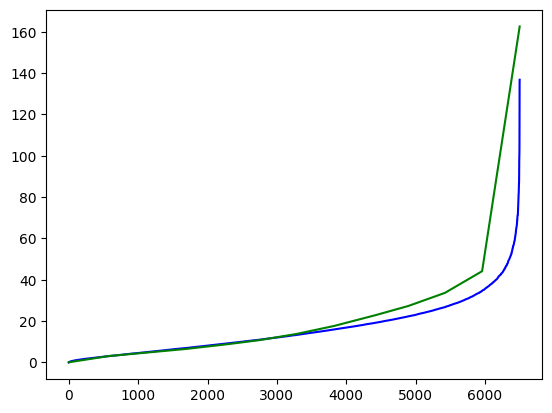

In [438]:
#vels = interpolate_vectors(np.sort(vels), len(out))
plt.plot(np.sort(out*.325/.12), c='b')
plt.plot(np.sort(vels), c='g')

In [170]:
out

array([-3.1738932 , -0.28364426, -0.8634911 , ..., 37.85599   ,
       47.69673   , 43.048542  ], dtype=float32)

(4e-05, 0.1)

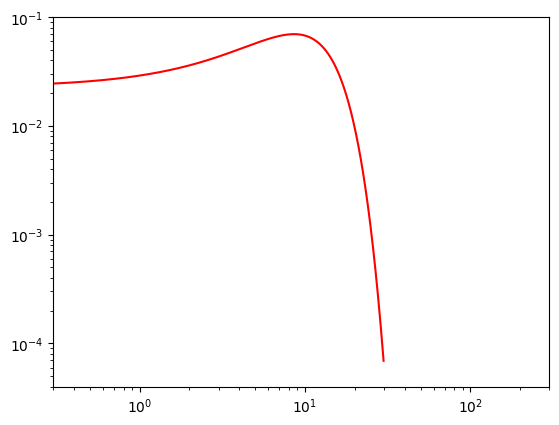

In [117]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm
#new_out=(out6*4+out2*1+out9*.5+out11*1+out10*2.5)/9
a,b= norm.fit(np.sort(out*.325/.12))
xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_torch=norm.pdf(xtorch, a,b)
plt.plot(xtorch,distr_torch,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,3e2])
plt.ylim([4e-5,.1])
#15, 16, 20, 9, 3, 10
#3, 4, 6, 7, 12, 13, 17, 18, 19, 20

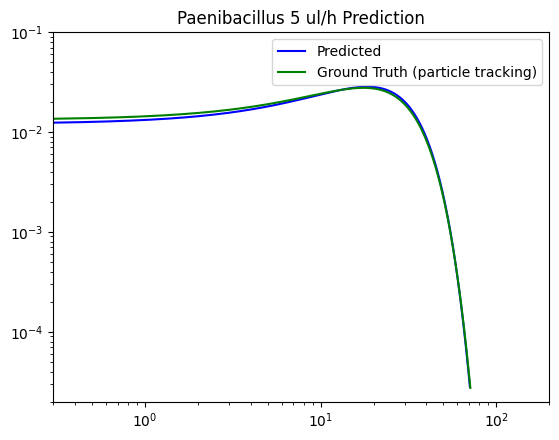

In [1145]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
distr_vel=norm.pdf(xvel, a,b)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([2e-5,.1])
plt.title('Paenibacillus 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

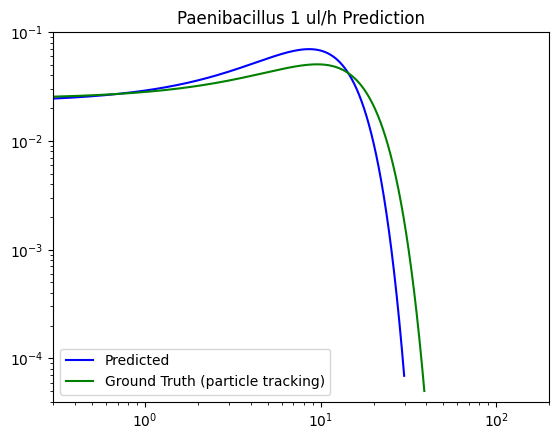

In [118]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_vel=norm.pdf(xvel, a,b)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Paenibacillus 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

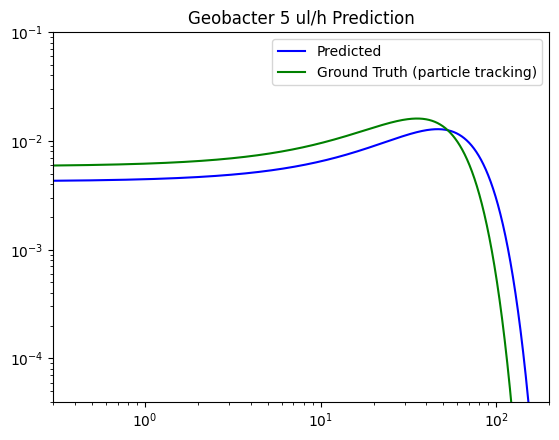

In [169]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
distr_vel=norm.pdf(xvel, a,b)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Geobacter 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

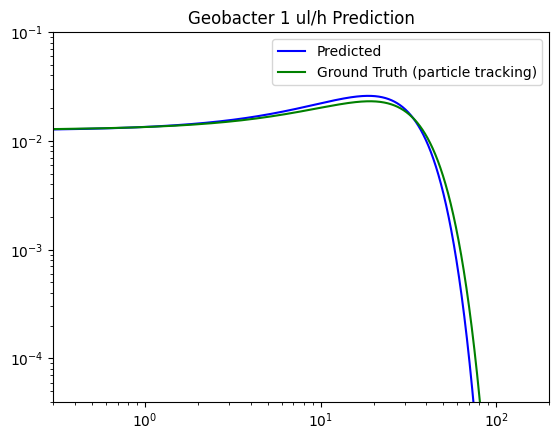

In [1185]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
distr_vel=norm.pdf(xvel, a,b)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Geobacter 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

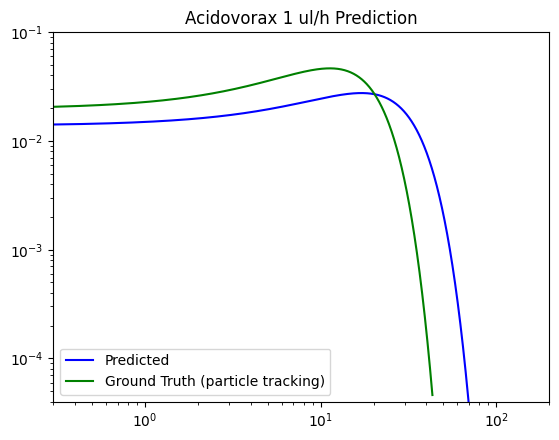

In [1211]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
distr_vel=norm.pdf(xvel, a,b)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Acidovorax 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

# Model Training

In [1]:
import os

sim_dir = os.listdir('lbm_sims')
file_dir = os.listdir('lbm_traj_files')
# Custom sorting key function
def sort_key(item):
    if '_brown' in item:
        return (1, int(item[3:-6]))
    elif 'straight' in item:
        return (2, int(item[3:-9]))
    elif 'blank' in item:
        return (3, int(item[3:-6]))
    else:
        return (0, int(item[3:]))

# Sort the list using the custom key
sorted_sim_dir = sorted(sim_dir, key=sort_key)
#sorted_sim_dir=sorted_sim_dir[1110:]
print(sorted_sim_dir)

['sim1', 'sim2', 'sim3', 'sim4', 'sim5', 'sim6', 'sim7', 'sim8', 'sim9', 'sim10', 'sim11', 'sim12', 'sim13', 'sim14', 'sim15', 'sim16', 'sim17', 'sim18', 'sim19', 'sim20', 'sim21', 'sim22', 'sim23', 'sim24', 'sim25', 'sim26', 'sim27', 'sim28', 'sim29', 'sim30', 'sim31', 'sim32', 'sim33', 'sim34', 'sim35', 'sim36', 'sim37', 'sim38', 'sim39', 'sim40', 'sim41', 'sim42', 'sim43', 'sim44', 'sim45', 'sim46', 'sim47', 'sim48', 'sim49', 'sim50', 'sim51', 'sim52', 'sim53', 'sim54', 'sim55', 'sim56', 'sim57', 'sim58', 'sim59', 'sim60', 'sim61', 'sim62', 'sim63', 'sim64', 'sim65', 'sim66', 'sim67', 'sim68', 'sim69', 'sim70', 'sim71', 'sim72', 'sim73', 'sim74', 'sim75', 'sim76', 'sim77', 'sim78', 'sim79', 'sim80', 'sim81', 'sim82', 'sim83', 'sim84', 'sim85', 'sim86', 'sim87', 'sim88', 'sim89', 'sim90', 'sim91', 'sim92', 'sim93', 'sim94', 'sim95', 'sim96', 'sim97', 'sim98', 'sim99', 'sim100', 'sim101', 'sim102', 'sim103', 'sim104', 'sim105', 'sim106', 'sim107', 'sim108', 'sim109', 'sim110', 'sim111

In [2]:
import os


# Custom sorting key function
def sort_key2(item):
    if '_brown' in item:
        return (1, int(item[6:-10]))
    elif 'straight' in item:
        return (2, int(item[6:-13]))
    elif 'blank' in item:
        return (3, int(item[6:-10])) # Extract the numeric part for files with '_brown'
    else:
        return (0, int(item[6:-4]))  # Extract the numeric part for files without '_brown'

# Sort the list using the custom key
sorted_file_dir = sorted(file_dir, key=sort_key2)

# Split the sorted list into 'yc_' and 'xc_' files
yc_files = [f for f in sorted_file_dir if f.startswith('yc_')]
xc_files = [f for f in sorted_file_dir if f.startswith('xc_')]

# Create a list of lists with corresponding 'yc_' and 'xc_' files
sorted_file_pairs = [[yc, xc] for yc, xc in zip(yc_files, xc_files)]

#sorted_file_pairs=sorted_file_pairs[1110:]
print(sorted_file_pairs)

[['yc_sim1.csv', 'xc_sim1.csv'], ['yc_sim2.csv', 'xc_sim2.csv'], ['yc_sim3.csv', 'xc_sim3.csv'], ['yc_sim4.csv', 'xc_sim4.csv'], ['yc_sim5.csv', 'xc_sim5.csv'], ['yc_sim6.csv', 'xc_sim6.csv'], ['yc_sim7.csv', 'xc_sim7.csv'], ['yc_sim8.csv', 'xc_sim8.csv'], ['yc_sim9.csv', 'xc_sim9.csv'], ['yc_sim10.csv', 'xc_sim10.csv'], ['yc_sim11.csv', 'xc_sim11.csv'], ['yc_sim12.csv', 'xc_sim12.csv'], ['yc_sim13.csv', 'xc_sim13.csv'], ['yc_sim14.csv', 'xc_sim14.csv'], ['yc_sim15.csv', 'xc_sim15.csv'], ['yc_sim16.csv', 'xc_sim16.csv'], ['yc_sim17.csv', 'xc_sim17.csv'], ['yc_sim18.csv', 'xc_sim18.csv'], ['yc_sim19.csv', 'xc_sim19.csv'], ['yc_sim20.csv', 'xc_sim20.csv'], ['yc_sim21.csv', 'xc_sim21.csv'], ['yc_sim22.csv', 'xc_sim22.csv'], ['yc_sim23.csv', 'xc_sim23.csv'], ['yc_sim24.csv', 'xc_sim24.csv'], ['yc_sim25.csv', 'xc_sim25.csv'], ['yc_sim26.csv', 'xc_sim26.csv'], ['yc_sim27.csv', 'xc_sim27.csv'], ['yc_sim28.csv', 'xc_sim28.csv'], ['yc_sim29.csv', 'xc_sim29.csv'], ['yc_sim30.csv', 'xc_sim30.csv'

In [3]:
# from sklearn.model_selection import train_test_split

# # Create a range of numbers from 0 to 534
# indices = range(535)

# # Perform the train-test split
# train_indices, test_indices = train_test_split(indices, test_size=0.2)

In [4]:
# test_indices

In [5]:
# test_dirs = [sorted_file_pairs[i] for i in test_indices]
# train_dirs = [sorted_file_pairs[i] for i in train_indices]

# len(test_dirs)

In [6]:
train_dirs = sorted_file_pairs#[0:-100]+sorted_file_pairs[5::6]
train_dirs = sorted_file_pairs[1::5]+sorted_file_pairs[2::5]+sorted_file_pairs[3::5]+sorted_file_pairs[4::5]#+sorted_file_pairs[7::7]
len(train_dirs)
test_dirs = sorted_file_pairs[0::5]

In [7]:
# test_image_files = [sorted_sim_dir[i] for i in test_indices]
# train_image_files = [sorted_sim_dir[i] for i in train_indices]

In [8]:
train_image_files = sorted_sim_dir[1::5]+sorted_sim_dir[2::5]+sorted_sim_dir[3::5]+sorted_sim_dir[4::5]#+sorted_file_pairs[7::7]
print(len(train_dirs))
test_image_files = sorted_sim_dir[0::5]


1159


In [9]:
# train_image_files = sorted_sim_dir#[0:-100]
# train_image_files = sorted_sim_dir[1::6]+sorted_sim_dir[2::6]+sorted_sim_dir[3::6]+sorted_sim_dir[4::6]+sorted_sim_dir[5::6]#+sorted_file_pairs[6::7]+sorted_file_pairs[7::7]
# len(train_dirs)
# #train_image_files = sorted_sim_dir[1::7]+sorted_sim_dir[2::7]+sorted_sim_dir[3::7]+sorted_sim_dir[4::7]+sorted_sim_dir[5::7]+sorted_sim_dir[6::7]+sorted_sim_dir[7::7]

len(train_image_files)

1159

In [10]:
len(test_image_files)

290

In [11]:
len(test_dirs)

290

In [12]:
import timm

In [13]:
# timm.list_models()

In [14]:
# swinv2_small_window16_256
# vit_so150m_patch16_reg4_gap_256
# maxxvitv2_nano_rw_256
# levit_conv_256d

In [14]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re

s=448
k=35
images_train = torch.zeros(len(train_image_files),k-5,s, s)
images_test = torch.zeros(len(test_image_files),k-5,s, s)
for i in range(len(train_image_files)):
    base = 'lbm_sims/'+train_image_files[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(5,k):
        
        img= torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        img = (img-torch.min(img))/(torch.max(img)-torch.min(img))
        img = torch.nan_to_num(img, 1)
        images_train[i,j-5,:,:] = img


for i in range(len(test_image_files)):
    base = 'lbm_sims/'+test_image_files[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(5,k):
        
        img = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        img = (img-torch.min(img))/(torch.max(img)-torch.min(img))
        img = torch.nan_to_num(img, 1)
        images_test[i,j-5,:,:] = img
        
im_dir

['Fig_1.jpg',
 'Fig_2.jpg',
 'Fig_3.jpg',
 'Fig_4.jpg',
 'Fig_5.jpg',
 'Fig_6.jpg',
 'Fig_7.jpg',
 'Fig_8.jpg',
 'Fig_9.jpg',
 'Fig_10.jpg',
 'Fig_11.jpg',
 'Fig_12.jpg',
 'Fig_13.jpg',
 'Fig_14.jpg',
 'Fig_15.jpg',
 'Fig_16.jpg',
 'Fig_17.jpg',
 'Fig_18.jpg',
 'Fig_19.jpg',
 'Fig_20.jpg',
 'Fig_21.jpg',
 'Fig_22.jpg',
 'Fig_23.jpg',
 'Fig_24.jpg',
 'Fig_25.jpg',
 'Fig_26.jpg',
 'Fig_27.jpg',
 'Fig_28.jpg',
 'Fig_29.jpg',
 'Fig_30.jpg',
 'Fig_31.jpg',
 'Fig_32.jpg',
 'Fig_33.jpg',
 'Fig_34.jpg',
 'Fig_35.jpg',
 'Fig_36.jpg',
 'Fig_37.jpg',
 'Fig_38.jpg',
 'Fig_39.jpg',
 'Fig_40.jpg']

In [15]:
import matplotlib.pyplot as plt
#plt.imshow(images_train[100,30,:,:])
images_train.shape

torch.Size([1159, 30, 448, 448])

In [16]:
import gc
del im_dir
gc.collect()

0

In [17]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re
import matplotlib.pyplot as plt
from scipy.stats import exponweib,lognorm

def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
    

base='lbm_traj_files/'
target_length=500
speeds = torch.zeros(len(train_dirs),500)
for i in range(len(train_dirs)):
    x_arr= np.array(pd.read_csv(base+train_dirs[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+train_dirs[i][0], header=None))
    vx = np.diff(x_arr, axis=0)
    vy = np.diff(y_arr, axis=0)
    speed = np.sqrt(vx**2+vy**2)
    speed = np.reshape(speed, [-1])
    speed=speed[~np.isnan(speed)]
    speed = speed[speed>0]
    speed = speed[speed<400]
    #speed[speed<=0]=0.0001
    speed = interpolate_vectors(np.sort(speed), target_length)
    
    # speed = torch.mean(torch.tensor(speed))
    # if speed > 20:
    #     speeds[i,0] = 1
    # elif speed > 10:
    #     speeds[i,1] = 1
    # elif speed > 6:
    #     speeds[i,2] = 1
    # elif speed > 3:
    #     speeds[i,3] = 1
    # else:
    #     speeds[i,4] = 1
    speeds[i,:] = torch.tensor(speed)
#torch.max(speeds)
speeds

tensor([[3.0206e-02, 9.7728e-02, 1.2920e-01,  ..., 8.5694e+00, 8.9793e+00,
         1.0117e+01],
        [1.5918e-03, 3.4114e-02, 4.5697e-02,  ..., 1.6833e+00, 1.7716e+00,
         2.1750e+00],
        [2.4003e-02, 1.6080e-01, 2.2043e-01,  ..., 2.3209e+01, 2.4776e+01,
         2.7376e+01],
        ...,
        [5.0000e-01, 5.5831e-01, 7.5000e-01,  ..., 2.6870e+01, 2.7047e+01,
         2.8462e+01],
        [2.5000e-01, 2.5000e-01, 2.5000e-01,  ..., 8.6584e+00, 8.8388e+00,
         9.3708e+00],
        [2.5000e-01, 2.5000e-01, 2.5000e-01,  ..., 7.6035e+00, 7.7782e+00,
         8.3104e+00]])

In [18]:

speeds_test = torch.zeros(len(test_dirs),500)
for i in range(len(test_dirs)):
    x_arr= np.array(pd.read_csv(base+test_dirs[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+test_dirs[i][0], header=None))
    vx = np.diff(x_arr, axis=0)
    vy = np.diff(y_arr, axis=0)
    speed = np.sqrt(vx**2+vy**2)
    speed = np.reshape(speed, [-1])
    speed=speed[~np.isnan(speed)]
    speed = speed[speed>0]
    speed = speed[speed<400]
    #speed[speed<=0]=0.0001
    speed = interpolate_vectors(np.sort(speed), target_length)

    # speed = torch.mean(torch.tensor(speed))
    # if speed > 20:
    #     speeds_test[i,0] = 1
    # elif speed > 10:
    #     speeds_test[i,1] = 1
    # elif speed > 6:
    #     speeds_test[i,2] = 1
    # elif speed > 3:
    #     speeds_test[i,3] = 1
    # else:
    #     speeds_test[i,4] = 1
    speeds_test[i,:] = torch.tensor(speed)
torch.max(speeds_test)

tensor(254.0891)

In [19]:
torch.mean(images_test[0])

tensor(0.8953)

In [20]:
speeds_test

tensor([[3.5506e-02, 9.6284e-02, 1.4864e-01,  ..., 4.8763e+00, 5.2142e+00,
         5.8082e+00],
        [3.1629e-01, 4.0344e-01, 5.4550e-01,  ..., 2.4374e+01, 2.5305e+01,
         2.7919e+01],
        [5.5513e-03, 8.6064e-02, 1.1347e-01,  ..., 5.2878e+00, 5.7395e+00,
         6.8761e+00],
        ...,
        [2.5000e-01, 2.5000e-01, 2.5000e-01,  ..., 3.1822e+01, 3.2009e+01,
         3.2575e+01],
        [2.5000e-01, 2.5000e-01, 2.5000e-01,  ..., 9.1924e+00, 9.1939e+00,
         1.0960e+01],
        [2.5000e-01, 2.5000e-01, 2.5000e-01,  ..., 1.1314e+01, 1.1504e+01,
         1.2199e+01]])

In [21]:
import os

sim_dir = os.listdir('all_sims')
file_dir = os.listdir('all_traj_files')
# Custom sorting key function
def sort_key(item):
    if '_brown' in item:
        return (1, int(item[3:-6]))
    elif 'straight' in item:
        return (2, int(item[3:-9]))
    elif 'blank' in item:
        return (3, int(item[3:-6]))
    else:
        return (0, int(item[3:]))

# Sort the list using the custom key
sorted_sim_dir2 = sorted(sim_dir, key=sort_key)
#sorted_sim_dir=sorted_sim_dir[0:200]
print(sorted_sim_dir2)

['sim61', 'sim62', 'sim63', 'sim64', 'sim65', 'sim66', 'sim67', 'sim68', 'sim69', 'sim70', 'sim71', 'sim72', 'sim73', 'sim74', 'sim75', 'sim76', 'sim77', 'sim78', 'sim79', 'sim80', 'sim81', 'sim82', 'sim83', 'sim84', 'sim85', 'sim86', 'sim87', 'sim88', 'sim89', 'sim90', 'sim91', 'sim92', 'sim93', 'sim94', 'sim95', 'sim96', 'sim97', 'sim98', 'sim99', 'sim100', 'sim101', 'sim102', 'sim103', 'sim104', 'sim105', 'sim106', 'sim107', 'sim108', 'sim109', 'sim110', 'sim111', 'sim112', 'sim113', 'sim114', 'sim115', 'sim116', 'sim117', 'sim118', 'sim119', 'sim120', 'sim121', 'sim122', 'sim123', 'sim124', 'sim125', 'sim126', 'sim127', 'sim128', 'sim129', 'sim130', 'sim131', 'sim132', 'sim133', 'sim134', 'sim135', 'sim136', 'sim137', 'sim138', 'sim139', 'sim140', 'sim141', 'sim142', 'sim143', 'sim144', 'sim145', 'sim146', 'sim147', 'sim148', 'sim149', 'sim150', 'sim151', 'sim152', 'sim153', 'sim154', 'sim155', 'sim156', 'sim157', 'sim158', 'sim159', 'sim161', 'sim162', 'sim163', 'sim164', 'sim165'

In [22]:
import os


# Custom sorting key function
def sort_key2(item):
    if '_brown' in item:
        return (1, int(item[6:-10]))
    elif 'straight' in item:
        return (2, int(item[6:-13]))
    elif 'blank' in item:
        return (3, int(item[6:-10])) # Extract the numeric part for files with '_brown'
    else:
        return (0, int(item[6:-4]))  # Extract the numeric part for files without '_brown'

# Sort the list using the custom key
sorted_file_dir = sorted(file_dir, key=sort_key2)

# Split the sorted list into 'yc_' and 'xc_' files
yc_files = [f for f in sorted_file_dir if f.startswith('yc_')]
xc_files = [f for f in sorted_file_dir if f.startswith('xc_')]

# Create a list of lists with corresponding 'yc_' and 'xc_' files
sorted_file_pairs2 = [[yc, xc] for yc, xc in zip(yc_files, xc_files)]

#sorted_file_pairs=sorted_file_pairs[0:200]
print(sorted_file_pairs2)

[['yc_sim61.csv', 'xc_sim61.csv'], ['yc_sim62.csv', 'xc_sim62.csv'], ['yc_sim63.csv', 'xc_sim63.csv'], ['yc_sim64.csv', 'xc_sim64.csv'], ['yc_sim65.csv', 'xc_sim65.csv'], ['yc_sim66.csv', 'xc_sim66.csv'], ['yc_sim67.csv', 'xc_sim67.csv'], ['yc_sim68.csv', 'xc_sim68.csv'], ['yc_sim69.csv', 'xc_sim69.csv'], ['yc_sim70.csv', 'xc_sim70.csv'], ['yc_sim71.csv', 'xc_sim71.csv'], ['yc_sim72.csv', 'xc_sim72.csv'], ['yc_sim73.csv', 'xc_sim73.csv'], ['yc_sim74.csv', 'xc_sim74.csv'], ['yc_sim75.csv', 'xc_sim75.csv'], ['yc_sim76.csv', 'xc_sim76.csv'], ['yc_sim77.csv', 'xc_sim77.csv'], ['yc_sim78.csv', 'xc_sim78.csv'], ['yc_sim79.csv', 'xc_sim79.csv'], ['yc_sim80.csv', 'xc_sim80.csv'], ['yc_sim81.csv', 'xc_sim81.csv'], ['yc_sim82.csv', 'xc_sim82.csv'], ['yc_sim83.csv', 'xc_sim83.csv'], ['yc_sim84.csv', 'xc_sim84.csv'], ['yc_sim85.csv', 'xc_sim85.csv'], ['yc_sim86.csv', 'xc_sim86.csv'], ['yc_sim87.csv', 'xc_sim87.csv'], ['yc_sim88.csv', 'xc_sim88.csv'], ['yc_sim89.csv', 'xc_sim89.csv'], ['yc_sim90.cs

In [23]:
#train_dirs2 = sorted_file_pairs2#[0:-100]+sorted_file_pairs[5::6]
train_dirs2 = sorted_file_pairs2[0::5]+sorted_file_pairs2[2::5]+sorted_file_pairs2[3::5]+sorted_file_pairs2[4::5]#+sorted_file_pairs[7::7]
test_dirs2 = sorted_file_pairs2[1::5]

train_image_files2 = sorted_sim_dir2[0::5]+sorted_sim_dir2[2::5]+sorted_sim_dir2[3::5]+sorted_sim_dir2[4::5]#+sorted_file_pairs[7::7]
print(len(train_dirs2))
print(len(test_dirs2))
test_image_files2 = sorted_sim_dir2[1::5]

s=384
k=35
images_train2 = torch.zeros(len(train_image_files2),k-5,s, s)
images_test2 = torch.zeros(len(test_image_files2),k-5,s, s)
for i in range(len(train_image_files2)):
    base = 'all_sims/'+train_image_files2[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(5,k):
        
        img= torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        img = (img-torch.min(img))/(torch.max(img)-torch.min(img))
        images_train2[i,j-5,:,:] = img


for i in range(len(test_image_files2)):
    base = 'all_sims/'+test_image_files2[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(5,k):
        
        img = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        img = (img-torch.min(img))/(torch.max(img)-torch.min(img))
        images_test2[i,j-5,:,:] = img
        
base='all_traj_files/'
target_length=500
speeds2 = torch.zeros(len(train_dirs2),5)
for i in range(len(train_dirs2)):
    x_arr= np.array(pd.read_csv(base+train_dirs2[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+train_dirs2[i][0], header=None))
    vx = np.diff(x_arr, axis=0)
    vy = np.diff(y_arr, axis=0)
    speed = np.sqrt(vx**2+vy**2)
    speed = np.reshape(speed, [-1])
    speed=speed[~np.isnan(speed)]
    speed = speed[speed>0]
    speed = speed[speed<400]
    #speed[speed<=0]=0.0001
    speed = interpolate_vectors(np.sort(speed), target_length)
    
    speed = torch.mean(torch.tensor(speed))
    if speed > 20:
        speeds2[i,0] = 1
    elif speed > 10:
        speeds2[i,1] = 1
    elif speed > 6:
        speeds2[i,2] = 1
    elif speed > 3:
        speeds2[i,3] = 1
    else:
        speeds2[i,4] = 1
    #speeds2[i,:] = torch.tensor(speed)

speeds_test2 = torch.zeros(len(test_dirs2),5)
for i in range(len(test_dirs2)):
    x_arr= np.array(pd.read_csv(base+test_dirs2[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+test_dirs2[i][0], header=None))
    vx = np.diff(x_arr, axis=0)
    vy = np.diff(y_arr, axis=0)
    speed = np.sqrt(vx**2+vy**2)
    speed = np.reshape(speed, [-1])
    speed=speed[~np.isnan(speed)]
    speed = speed[speed>0]
    speed = speed[speed<400]
    #speed[speed<=0]=0.0001
    speed = interpolate_vectors(np.sort(speed), target_length)
    
    speed = torch.mean(torch.tensor(speed))
    if speed > 20:
        speeds_test2[i,0] = 1
    elif speed > 10:
        speeds_test2[i,1] = 1
    elif speed > 6:
        speeds_test2[i,2] = 1
    elif speed > 3:
        speeds_test2[i,3] = 1
    else:
        speeds_test2[i,4] = 1
    #speeds_test2[i,:] = torch.tensor(speed)
speeds_test2

764
191


tensor([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0

In [24]:
speeds_test3 = torch.cat([speeds_test,speeds_test2])
speeds_test3.shape

speeds3 = torch.cat([speeds,speeds2])
speeds3.shape
del speeds_test, speeds_test2

In [25]:
images_test = torch.cat([images_test,images_test2])
del images_test2
images_test.shape

torch.Size([412, 30, 384, 384])

In [26]:
images_train = torch.cat([images_train,images_train2])
del images_train2
images_train.shape

torch.Size([1645, 30, 384, 384])

In [22]:
import timm
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [27]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        l=200
        self.fc2=nn.Conv2d(100, l, 1, stride=2)
        #self.m1 = nn.BatchNorm1d(1000)
        self.d1 = nn.Dropout(.2)
        self.fc1=nn.Conv2d(40, 100, 1, stride=2)
        #self.m2 = nn.BatchNorm1d(l)
        self.d2 = nn.Dropout(.2)
       # self.fc2 = nn.Linear(800,l)
       # self.fc3=nn.Linear(2000,800)
       # self.fc4 = nn.Linear(800,l)
        self.fc5 = nn.Conv2d(l, 5,1, stride=1)
        #self.m3 = nn.BatchNorm1d(100)
        self.fc6 = nn.Linear(312500,1000)
        self.d3 = nn.Dropout(.2)
        self.fc7 = nn.Linear(100,4)
        self.fc8 = nn.Linear(2000,1000)

    def forward(self, x):
        b = x.shape[0]
        x = x.squeeze()
        
        l=200
        x = F.relu(self.fc1(x))
        #x = self.m1(x)
        x = self.d1(x)
        x = F.relu(self.fc2(x))
        #x = self.m2(x)
        x = self.d2(x)
        #x = x.permute(0,2,1)
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        
        #x = x.view(b,l*666)
        x = F.relu(self.fc5(x))
        #x = self.m3(x)
        x = x.reshape(b, -1)
        #x = F.relu(self.fc4(x))
        x = (self.fc6(x))
        # x = self.d3(x)
        # #x = torch.flatten(x)
        # x = (self.fc8(x))
        # x = x.reshape(2,200)
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

import torchvision

class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=30, drop_path_rate=0.4,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=30, drop_path_rate=0.4,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=30, drop_path_rate=0.4,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=30, drop_path_rate=0.4,num_classes=500,pretrained=True)


        self.fc0=nn.Linear(2000,500)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        #x = F.gelu(self.m0(x))
        x1 = F.relu(self.m1(x1))
        x2 = F.relu(self.m2(x2))
        x3 = F.relu(self.m3(x3))
        x4 = F.relu(self.m4(x4))
        
        #x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
       # del x1,x2, x3, x4
        #x0 = F.gelu(self.fc0(x0))
        #x = torch.cat([x,x0],dim=1)#x*x0
        #x = F.gelu(self.fc0(x))
        x = self.fc0(x)
        


        return x#,x2,x3,x4


    
class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

        # self.fc1=nn.Linear(4000,2000)
        # self.fc2 = nn.Linear(2000,1000)

        #self.fc3=nn.Linear(1000,1000)
        # self.fc3_2=nn.Linear(10,1)
        # self.fc4=nn.Linear(4000,10)
        # self.fc4_2=nn.Linear(10,1)
        # self.fc5=nn.Linear(4000,10)
        # self.fc5_2=nn.Linear(10,1)

    def forward(self, x):
        x = self.m1(x)
        
        # x = F.gelu(self.fc1(x))
        # x = self.fc2(x)
       # x = self.fc3(x)

        # x2 = F.gelu(self.fc3(x))
        # x2 = self.fc3_2(x2)
        # x3 = F.gelu(self.fc4(x))
        # x3 = self.fc4_2(x3)
        # x4 = F.gelu(self.fc5(x))
        # x4 = self.fc5_2(x4)

        return x#,x2,x3,x4
    
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        l=80

        self.fc1=nn.Linear(1000,l)
        self.d1 = nn.Dropout(.1)
        self.fc2=nn.Linear(1000,l)
        self.d2 = nn.Dropout(.1)
        self.fc3 = nn.Linear(40*l*l,1000)
        self.d3 = nn.Dropout(.1)
        self.fc4 = nn.Linear(1000,250)
        self.fc4_2 = nn.Linear(250,1000)
#         self.fc4_3 = nn.Linear(800,300)
#         self.fc5 = nn.Linear(300,30)
# #         self.fc5_2 = nn.Linear(200,100)
# #         self.fc5_3 = nn.Linear(100,30)
#         self.fc6 = nn.Linear(30,3)

    def forward(self, x):
        b = x.shape[0]
        x = F.relu(self.fc1(x))
        x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.relu(self.fc2(x))
        x = self.d2(x)
        x = torch.reshape(x, [b,-1])
        x = F.relu(self.fc3(x))
        x = self.d3(x)
        x = F.relu(self.fc4(x))
        #x = torch.reshape(x, [b,10000])
        x = (self.fc4_2(x))
#         x = F.rrelu(self.fc4_3(x))
#         x = F.rrelu(self.fc5(x))
# #         x = F.rrelu(self.fc5_2(x))
# #         x = F.rrelu(self.fc5_3(x))
#         x = self.fc6(x)
        #x = torch.reshape(x, [b,2,100])
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

In [7]:
384/8

48.0

In [11]:
# import torch
# import torch.nn as nn
# import timm

# class SpatiotemporalPatchEmbedding(nn.Module):
#     def __init__(self, num_frames=40, img_size=448, patch_size=224, embed_dim=500):
#         super().__init__()
#         self.num_frames = num_frames
#         self.img_size = img_size
#         self.patch_size = patch_size
#         self.num_patches_per_frame = (img_size // patch_size) ** 2
#         self.total_patches = self.num_patches_per_frame * (num_frames // 2)

#         self.projection = nn.Linear(2 * patch_size * patch_size, embed_dim)
#         self.position_embeddings = nn.Parameter(torch.zeros(1, self.total_patches + 1, embed_dim))
#         self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

#     def forward(self, x):
#         batch_size = x.shape[0]
#         x = x.unfold(1, 2, 2).unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
#         x = x.reshape(batch_size, -1, 2, self.patch_size, self.patch_size)
#         x = x.permute(0, 1, 3, 4, 2)
#         x = x.reshape(batch_size, -1, 2 * self.patch_size * self.patch_size)
#         x = self.projection(x)

#         cls_tokens = self.cls_token.expand(batch_size, -1, -1)
#         x = torch.cat((cls_tokens, x), dim=1)
#         x = x + self.position_embeddings
#         return x

# class SpatiotemporalModel(nn.Module):
#     def __init__(self, num_frames=40, img_size=448, patch_size=224, num_classes=500):
#         super().__init__()
#         self.patch_embed = SpatiotemporalPatchEmbedding(num_frames, img_size, patch_size, num_classes)
#         self.models = nn.ModuleList([timm.create_model('volo_d1_224', pretrained=True) for _ in range(8)])
#         self.avg_pool = nn.AdaptiveAvgPool1d(1)

#     def forward(self, x):
#         x = self.patch_embed(x)
#         print(x.shape)
#         outputs = []
#         for i in range(2):
#             start = i * 224
#             end = (i+1)*224
#             patch1 = x[:, start:end, :]
#             patch2 = x[:, :, start:end]
#            # patch = patch.transpose(1, 2)
#             #patch = patch.reshape(-1, 3, self.patch_embed.patch_size, self.patch_embed.patch_size)
#             output1 = self.models[i](patch1)
#             output2 = self.models[i](patch2)
#             #output = self.avg_pool(output.transpose(1, 2)).squeeze()
#             outputs.append((output1+output2)/2)
#             #print(i)
#         outputs = torch.stack(outputs, dim=1)
#         return outputs

# # Example usage
# num_frames = 40
# img_size = 448
# patch_size = 224
# num_classes = 500

# # Create the model
# model = SpatiotemporalModel(num_frames, img_size, patch_size, num_classes)

# # Example input
# input_data = torch.randn(2, num_frames, img_size, img_size)

# # Forward pass
# output = model(input_data)

# print(f"Output shape: {output.shape}")

torch.Size([2, 81, 500])


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 2, 81, 500] to have 3 channels, but got 2 channels instead

In [22]:
images_train=1-images_train
images_test=1-images_test

In [23]:
images_test

tensor([[[[0.1063, 0.0945, 0.0945,  ..., 0.1063, 0.1181, 0.1417],
          [0.1181, 0.0984, 0.0945,  ..., 0.1024, 0.1024, 0.0945],
          [0.1102, 0.1575, 0.0630,  ..., 0.0866, 0.0984, 0.1181],
          ...,
          [0.1063, 0.1220, 0.0906,  ..., 0.0827, 0.1063, 0.1417],
          [0.1181, 0.0945, 0.1260,  ..., 0.1102, 0.0866, 0.1063],
          [0.0984, 0.1063, 0.1102,  ..., 0.1496, 0.1102, 0.0827]],

         [[0.1063, 0.0787, 0.0984,  ..., 0.1024, 0.0984, 0.0945],
          [0.0630, 0.1102, 0.0669,  ..., 0.1457, 0.0906, 0.1102],
          [0.1102, 0.0945, 0.1142,  ..., 0.1142, 0.0787, 0.0827],
          ...,
          [0.0945, 0.1024, 0.0984,  ..., 0.1260, 0.0906, 0.1339],
          [0.0748, 0.1142, 0.1063,  ..., 0.0984, 0.1181, 0.0984],
          [0.0866, 0.1260, 0.1102,  ..., 0.1102, 0.0945, 0.1339]],

         [[0.0787, 0.1024, 0.1024,  ..., 0.0984, 0.0669, 0.0906],
          [0.1063, 0.1024, 0.0748,  ..., 0.1142, 0.1102, 0.1142],
          [0.1102, 0.1260, 0.1260,  ..., 0

In [24]:
# images_train=images_train/255
# images_test=images_test/255
torch.mean(images_test[0])

tensor(0.1047)

tensor(1.)

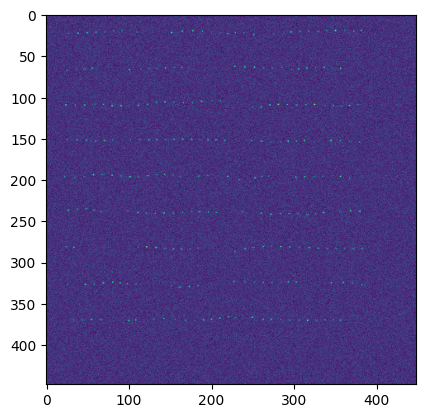

In [25]:
import matplotlib.pyplot as plt
plt.imshow(images_train[8,10,:,:])
torch.max(images_train[8,10,:,:])

In [25]:
images_test.shape

torch.Size([290, 30, 448, 448])

In [32]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'

# model = timm.create_model('volo_d3_448', in_chans=30,drop_path_rate=.4, num_classes=5,pretrained=True)
# model=Patch_model()
# model.to(device)
torch.cuda.empty_cache()
gc.collect()

class TestDataset(Dataset):
    def __init__(self, images, x):
        self.images = images
        self.x = x

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        x = self.x[index,:]
        return image.float(), x.float()
        
import random
from torchvision.transforms import v2
transforms1 = v2.Compose([v2.RandomShortestSize(100),                         
                         v2.Resize(448),
                         #v2.ColorJitter(),
                        ])
transforms2 = v2.Compose([v2.GaussianBlur(1),
                        ])
transforms3 = v2.Compose([
                          v2.RandomInvert(p=1), 
                        ]) 
    
class TrainDataset(Dataset):
    def __init__(self, images, x):
        self.images = images
        self.x = x

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        if random.random() < 0.5:
            image = image.flip(dims=[-1]) 
        if random.random() < 0.5:
            image = image.flip(dims=[-2])  # Assuming W=50 is the middle axis for flipping

        if random.random() < 0.5:
            image = image.flip(dims=[-3])  # Flipping the last dimension (H)

        if random.random() < 0.5:
            image = transforms1(image) # Flipping the last dimension (H)
        if random.random() < 0.5:
            image = transforms2(image)
        # if random.random() < 0.5:
        #     image = transforms3(image)
            
        x = self.x[index,:]
        return image.float(), x.float()


# Define your model architecture

import torch
from torch.utils.data import DataLoader, Sampler
import numpy as np



# Assuming you have your grayscale images and labels loaded in memory
from torch.optim.lr_scheduler import ExponentialLR, CosineAnnealingWarmRestarts


# maxs = torch.max(speeds)
# #mins = torch.min(speeds)
# print(maxs)#,mins)

# speeds2 = (speeds/maxs)#-mins)/(maxs-mins)
# speeds_test2 = (speeds_test/maxs)#-mins)/(maxs-mins)

dataset = TrainDataset(images_train, speeds)


# Create a dataloader
batch_size = 12
torch.cuda.empty_cache()
gc.collect()

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = TestDataset(images_test,speeds_test)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 12
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(),lr=0.00008,weight_decay=.01)
gamma = .99992# The exponential decay factor (adjust as needed)
#scheduler = ExponentialLR(optimizer, gamma=gamma)
scheduler = CosineAnnealingWarmRestarts(optimizer, 4000, 2)
torch.cuda.empty_cache()
gc.collect()

# Training loop
num_epochs = 40
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for im,speed in dataloader:
        optimizer.zero_grad()
        #outputs = F.softmax(model(im.to(device)),1)
        outputs = model(im.to(device))
        loss = criterion(outputs, speed.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()

    # Print the average loss for the epoch
    epoch_loss = running_loss / len(dataloader)
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for im_tst,speed_tst in test_dataloader:
            outputs_tst = model(im_tst.to(device))
            loss2 = criterion(outputs_tst, speed_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f},Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/40], Loss: 80.17680,  Test Loss: 71.59270,Learning Rate: 0.0000799
Epoch [2/40], Loss: 112.73617,  Test Loss: 125.27244,Learning Rate: 0.0000795
Epoch [3/40], Loss: 135.26755,  Test Loss: 115.20401,Learning Rate: 0.0000790
Epoch [4/40], Loss: 122.85228,  Test Loss: 113.88210,Learning Rate: 0.0000782
Epoch [5/40], Loss: 90.16323,  Test Loss: 106.62984,Learning Rate: 0.0000771
Epoch [6/40], Loss: 99.84636,  Test Loss: 90.61050,Learning Rate: 0.0000759
Epoch [7/40], Loss: 114.76448,  Test Loss: 119.79282,Learning Rate: 0.0000744
Epoch [8/40], Loss: 115.47790,  Test Loss: 135.78905,Learning Rate: 0.0000728
Epoch [9/40], Loss: 112.92583,  Test Loss: 115.46079,Learning Rate: 0.0000710
Epoch [10/40], Loss: 108.59301,  Test Loss: 61.41733,Learning Rate: 0.0000689
Epoch [11/40], Loss: 120.47451,  Test Loss: 92.91369,Learning Rate: 0.0000668
Epoch [12/40], Loss: 82.07012,  Test Loss: 67.73901,Learning Rate: 0.0000644
Epoch [13/40], Loss: 79.35696,  Test Loss: 66.89518,Learning Rate: 0.0

In [51]:
im[0][3]

tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])

tensor([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1

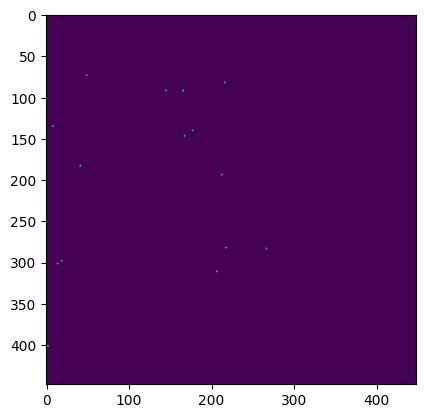

In [47]:
plt.imshow(im[0,20])
speeds_test

In [29]:

torch.cuda.empty_cache()
gc.collect()

27498

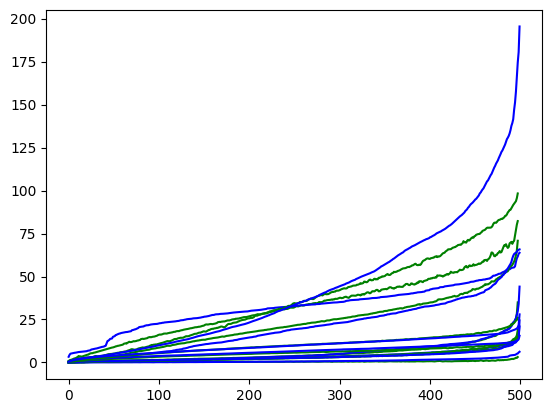

In [36]:
#k=8
model.eval()
ground_truth=[]
preds=[]
losses=[]
with torch.no_grad():
    for im_tst,speed_tst in test_dataloader:
    # Forward pass
        outputs_tst = model(im_tst.to(device))
        #loss2 = criterion(outputs_tst, speed_tst.to(device))
        out_vecs=[]
        for k in range(len(outputs_tst)):
            out = outputs_tst[k,:].cpu().detach().squeeze()
            #
            
            def rolling_mean(matrix, window):
                df = pd.DataFrame(matrix)
                return df.rolling(window=window).mean().dropna().to_numpy()
            out_mean = rolling_mean(out,3)
            #out_mean=out_mean[out_mean>0]
            out_mean[out_mean<0]=0.0001
            out_vecs.append(out_mean)
       # losses.append(loss2.item())
        preds.append(out_vecs)
        ground_truth.append(speed_tst.numpy())
        plt.plot(out_mean, c='g')
        plt.plot(speed_tst[k], c='b')
    # for i in out:
#     if (i>.03)&(count<400):
#         out[:,count
#     count+=1
# plt.plot(out_mean, c='g')
# plt.plot(speed_tst[k], c='b')

20.473472515450528

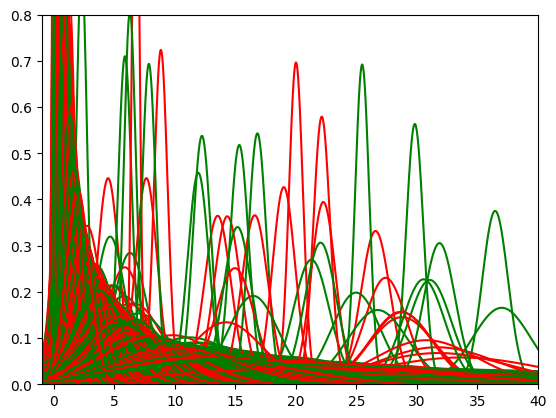

In [38]:
len(preds)
from scipy.stats import norm

losses=[]
full_preds=[]
criterion = nn.MSELoss()
#ground_truth[-1].shape
for i in range(len(preds)):
    for j in range(len(preds[i])):
        pred = preds[i][j]#(.00*preds1[i][j]+0.3*preds2[i][j]+.7*preds3[i][j])
        a,b = norm.fit(pred)

        xtorch= np.linspace(norm.ppf(0.0001, a,b),
                        norm.ppf(0.9999, a,b), target_length)
        distr_torch=norm.pdf(xtorch, a,b)
        plt.plot(xtorch,distr_torch,c='r')
        
        a,b = norm.fit(ground_truth[i][j,:])
        xtorch= np.linspace(norm.ppf(0.0001, a,b),
                        norm.ppf(0.9999, a,b), target_length)
        distr_torch=norm.pdf(xtorch, a,b)
        plt.plot(xtorch,distr_torch,c='g')
        plt.xlim([-1,40])
        plt.ylim([0,.8])
        full_preds.append(pred)
        loss = criterion(torch.tensor(pred).squeeze(), torch.tensor(ground_truth[i][j,:-2]))
        losses.append(loss.item())
        #plt.title('Loss = '+str(loss.item()))
        #plt.show()
        
np.mean(losses)
#ground_truth[0].shape

In [39]:
flat_pred = np.vstack(full_preds)
flat_pred=np.reshape(flat_pred,[-1,])
flat_pred.shape

(256470,)

In [40]:
flat_gt = np.vstack(ground_truth)
flat_gt=np.reshape(flat_gt,[-1,])
flat_gt.shape

(257500,)

In [41]:
maxs

tensor(1.)

In [35]:
torch.save(model.state_dict(), 'speed_model_patch_448px_disp_lbm_5_07_v2')

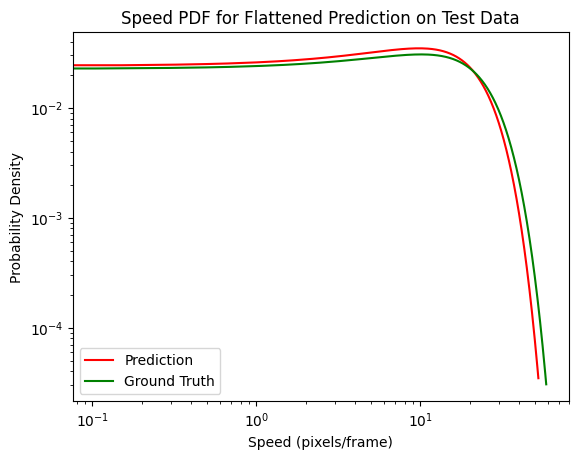

In [41]:
a,b = norm.fit(flat_pred)
#c=c+.4
#a=a+.1
# Generate points for plotting the fitted distribution
xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), target_length)

distr_torch=norm.pdf(xtorch, a,b)

# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='r')

# a = (3*a_tst[k].cpu().detach().numpy()+a)/4
# b = (3*b_tst[k].cpu().detach().numpy()+b)/4
# c = (3*c_tst[k].cpu().detach().numpy()+c)/4
# print(a+b+c)
# print(a,b,c)
# xtorch= np.linspace(lognorm.ppf(0.01, a,b,c),
#                 lognorm.ppf(0.99, a,b,c), target_length)

# distr_torch=lognorm.pdf(xtorch, a,b,c)
# print(a,b,c)
# # scales[i,:] = torch.tensor([a,b,c])
# plt.plot(xtorch,distr_torch,c='b')

a,b = norm.fit(flat_gt)
    
# Generate points for plotting the fitted distribution
xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), target_length)

distr_torch=norm.pdf(xtorch, a,b)


# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='g')
plt.title('Speed PDF for Flattened Prediction on Test Data')
plt.xlabel('Speed (pixels/frame)')
plt.ylabel('Probability Density')
plt.legend(['Prediction', 'Ground Truth'])
plt.xscale('log')
plt.yscale('log')

In [32]:
np.mean(flat_pred)

0.06223850810571292